In [8]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cvxpy as cp

In [9]:
sigma_1 = np.sqrt(2)
p_s_1 = np.array([1.,1.])

sigma_2 = np.sqrt(2)
p_s_2 = np.array([-1.,1.])

sigma_3 = np.sqrt(2)
p_s_3 = np.array([-1.,-1.])

S = np.block([
    [p_s_1],
    [p_s_2],
    [p_s_3]
])

np.linalg.norm(S, 2, axis=1)**2

Sigma = np.array([sigma_1, sigma_2, sigma_3])



In [10]:
S@(S.T)

array([[ 2.,  0., -2.],
       [ 0.,  2.,  0.],
       [-2.,  0.,  2.]])

In [14]:
p = cp.Variable(len(p_s_1))
objective = cp.Minimize(cp.norm2(np.diag(S@(S.T)) - 2*S@p + cp.QuadForm(p, np.eye(len(p_s_1))) - Sigma**2 ))

In [15]:
problem = cp.Problem(objective, [])
problem.solve()

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
Pnorm([2. 2. 2.] + -[[ 2.  2.]
 [-2.  2.]
 [-2. -2.]] @ var13 + Promote(QuadForm(var13, [[1. 0.]
 [0. 1.]]), (3,)) + -[2. 2. 2.], 2)

In [23]:
x = np.linspace(-3,3,100)
y = np.copy(x)
X,Y = np.meshgrid(x,y)

Z = (X - p_s_1[0])**2 + (Y - p_s_1[1])**2

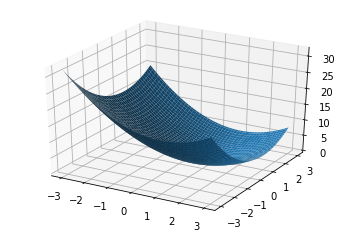

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()